In [1]:
import matplotlib.pyplot as plt
import sys  
sys.path.insert(0, '/Users/szczekulskij/side_projects/long-term-analysis-of-pws')
from src.generate_df import get_data_df
from src.graphs import graph_agg_metric_over_nr_sessions, graph_based_on_time_bucket
from src.anovas import bucketed_anova

# Main graphs:

Text(0, 0.5, 'metric improvement')

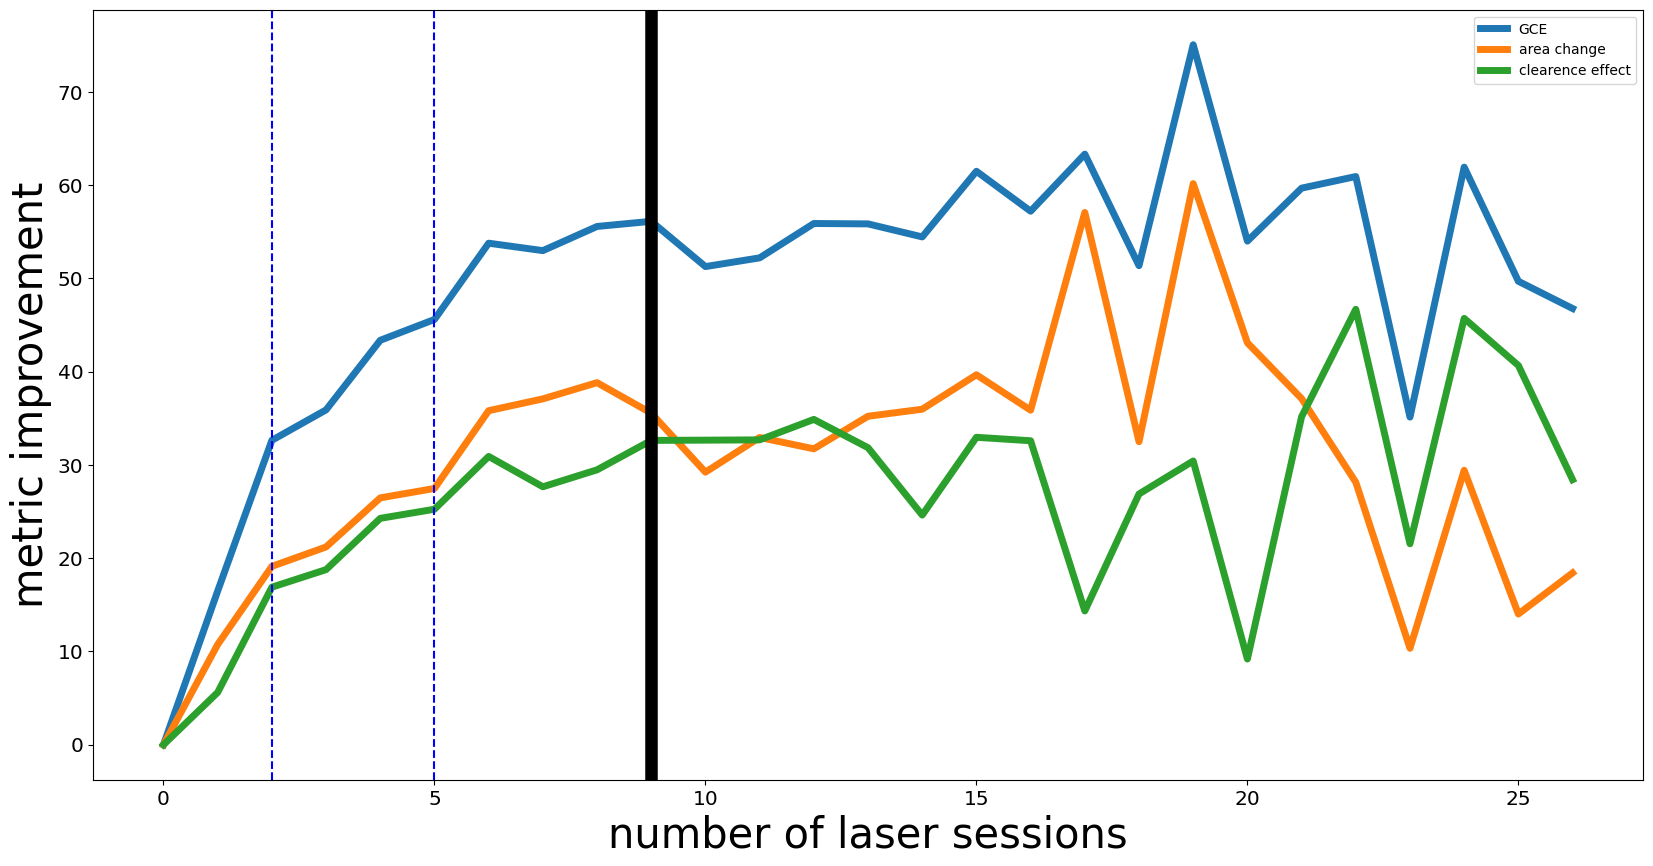

In [13]:
plt.figure(figsize=(20,10))
graph_agg_metric_over_nr_sessions("total_GCE", cut_last_x_visits = 27)
graph_agg_metric_over_nr_sessions("total_area_change", cut_last_x_visits = 27)
graph_agg_metric_over_nr_sessions("total_clearence_effect", cut_last_x_visits = 27)
plt.legend(["GCE", "area change", "clearence effect"])
plt.axvline(x=2, color='b', linestyle='--')
plt.axvline(x=5, color='b', linestyle='--')
plt.axvline(x=9, color='black', linestyle='-',  lw = 9)
plt.xlabel("number of laser sessions", size = 30)
plt.ylabel("metric improvement", size = 30)





anova results:
buckets: [1, 3, 6, 10, 15]
p_value: 2.672068635067671e-16

statistics between 1 - 2 bucket and 3 - 5 bucket
means: 24.95486 vs 41.40823
p-value: 0.0

statistics between 3 - 5 bucket and 6 - 9 bucket
means: 41.40823 vs 54.43362
p-value: 6e-05

statistics between 6 - 9 bucket and 10 - 14 bucket
means: 54.43362 vs 53.55368
p-value: 0.59677



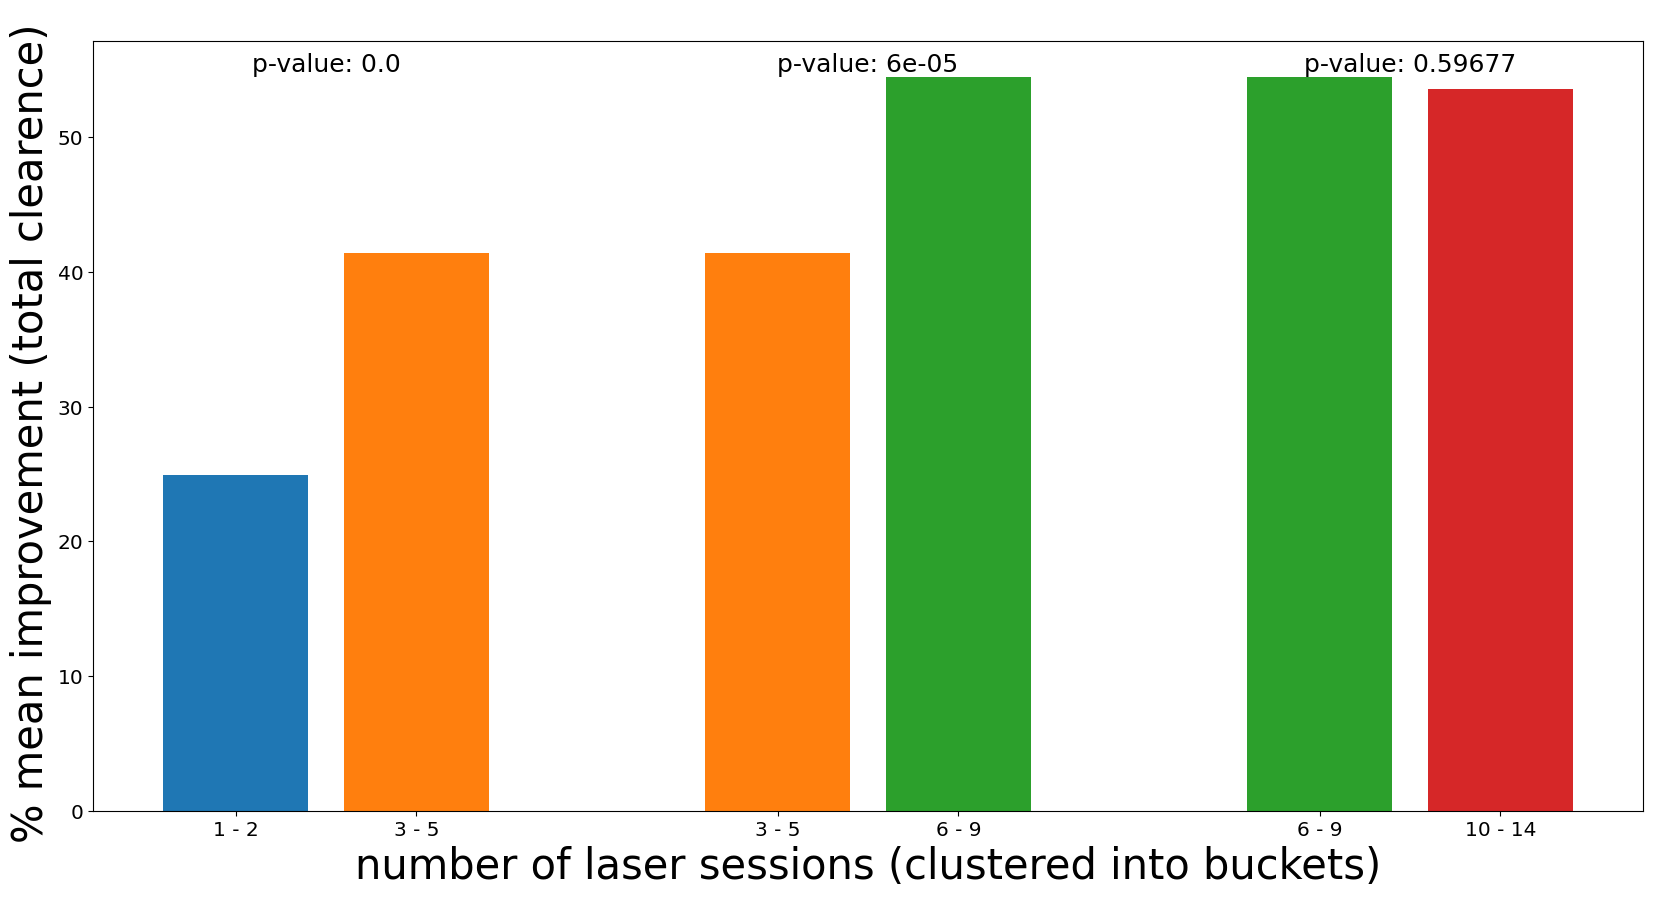

In [14]:
plt.figure(figsize=(20,10))
plt.ylabel("% mean improvement (total clearence) ", size = 30)
plt.xlabel("number of laser sessions (clustered into buckets)", size = 30)
bucketed_anova(
    bucket_column = "visit_nr",
    metric = "total_GCE",
    buckets = [1,3,6,10,15,],
    ttest_type = "less",
    p_value_text_height = 54.50
)

buckets:  [0, 90, 180, 270]
['0 - 90', '90 - 180', '180 - 270', '270+']


/usr/local/lib/python3.10/site-packages/pandas/core/apply.py:507: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  return self._try_aggregate_string_function(obj, f, *self.args, **self.kwargs)


,bucket,visits_per_bucket
0,0 - 90,255
1,90 - 180,41
2,180 - 270,21
3,270+,15


buckets:  [0, 90, 180, 270]
['0 - 90', '90 - 180', '180 - 270', '270+']


/usr/local/lib/python3.10/site-packages/pandas/core/apply.py:507: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  return self._try_aggregate_string_function(obj, f, *self.args, **self.kwargs)


,bucket,visits_per_bucket
0,0 - 90,255
1,90 - 180,41
2,180 - 270,21
3,270+,15


buckets:  [0, 90, 180, 270]
['0 - 90', '90 - 180', '180 - 270', '270+']


/usr/local/lib/python3.10/site-packages/pandas/core/apply.py:507: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  return self._try_aggregate_string_function(obj, f, *self.args, **self.kwargs)


,bucket,visits_per_bucket
0,0 - 90,255
1,90 - 180,41
2,180 - 270,21
3,270+,15


Text(0, 0.5, '% mean improvements inbetween consecutive visits')

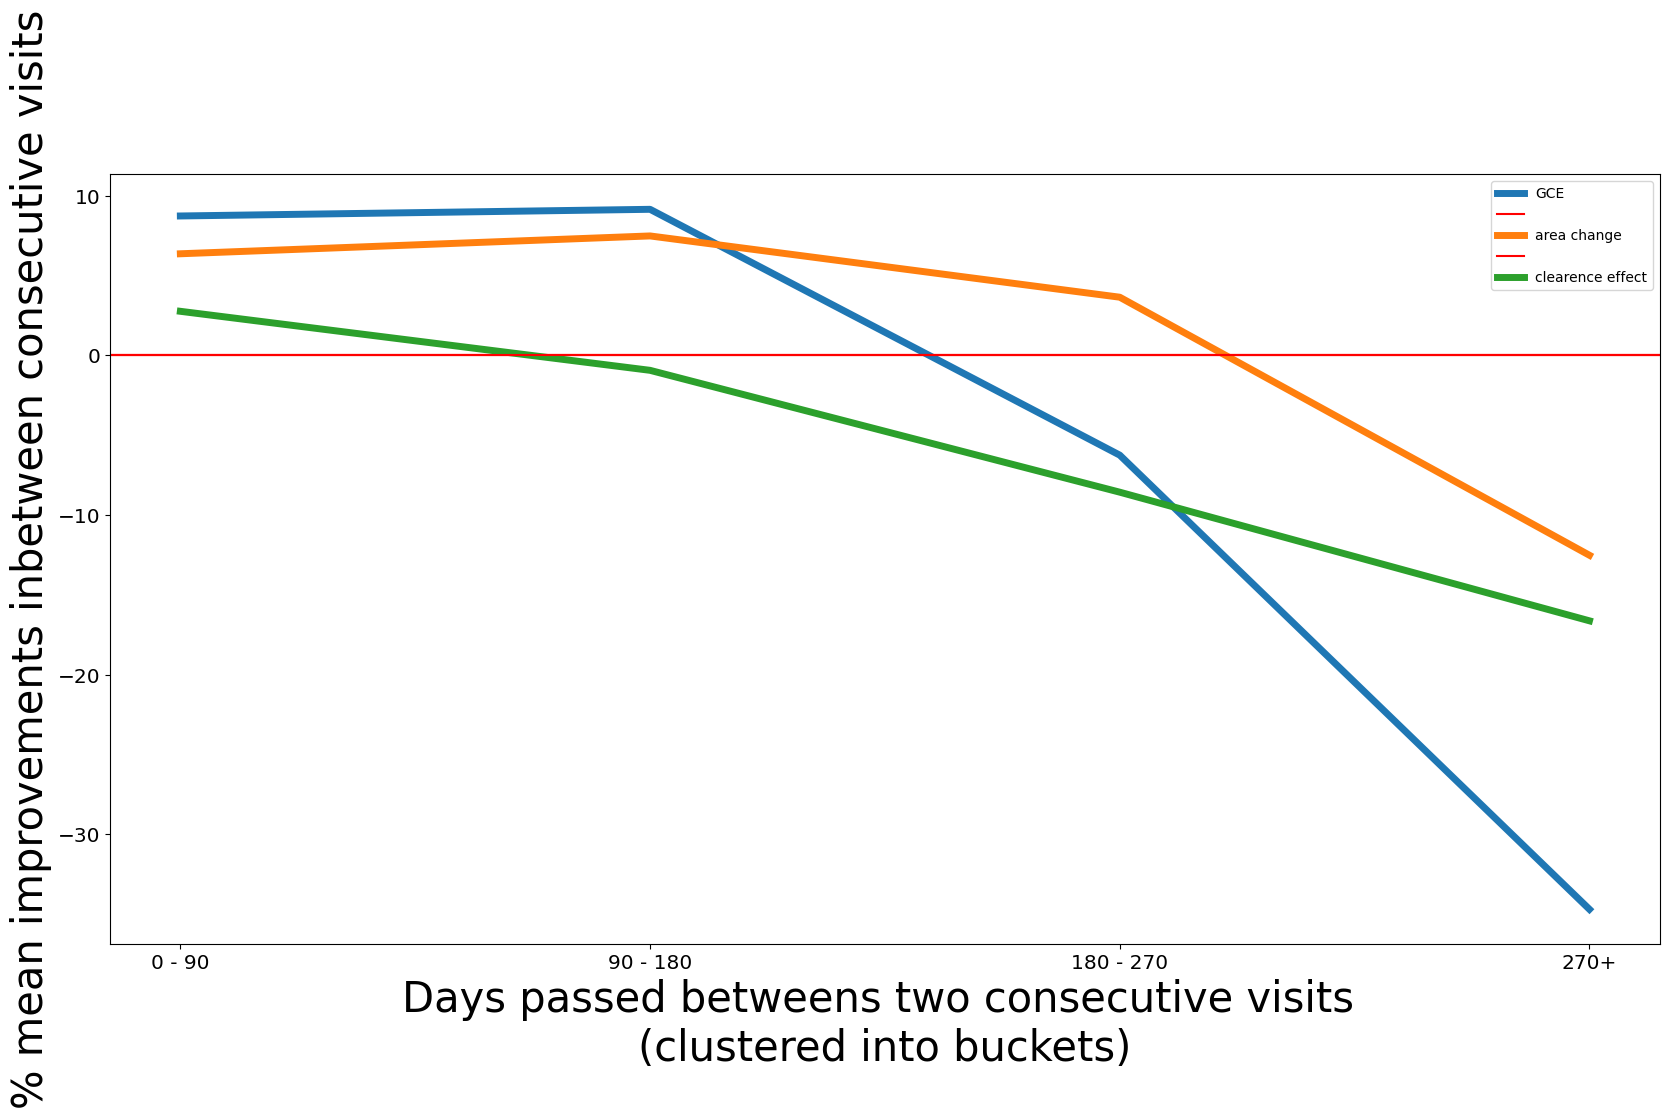

In [22]:
plt.figure(figsize=(20,10))
graph_based_on_time_bucket("inbetween_GCE", buckets_nr = 4, increment = 90)
graph_based_on_time_bucket("inbetween_area_change", buckets_nr = 4, increment = 90)
graph_based_on_time_bucket("inbetween_clearence_effect", buckets_nr = 4, increment = 90)
plt.legend(["GCE", "", "area change", "", "clearence effect"])
plt.xlabel("Days passed betweens two consecutive visits \n(clustered into buckets)", size = 30)
plt.ylabel("% mean improvements inbetween consecutive visits", size = 30)